In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFECV
import ml_utils as ml

In [2]:
# Download and load the data
import keras
import os

f_path_1 = "data/Euro_Salary.csv"
url_1 = "https://github.com/AkeemSemper/ml_data/raw/main/Euro_Salary.csv"
if not os.path.exists(f_path_1):
    file_1 = keras.utils.get_file(f_path_1, url_1)
df = pd.read_csv(f_path_1)
df_final = pd.read_csv(f_path_1)

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure you publish it after having run it, all the output should be showing.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a "presentation version" at the bottom, where you show what you did, and the results. Basically, you start with the original data, you do some work to figure out what's needed, you try a few models and select the best. At the bottom, put what <i>you actually settled on</i>, i.e. after all the figuring and exploring, here's the code that goes from raw data to final results, and here's what the results were. I should be able to read this part and understand what you did clearly:
    <ul>
        <li> Please make a pipeline that does the prep work - you may need some exploration or several trials before settling on what exactly to use, that's normal. Once you've settled, build that into a pipeline so it's clear and repeatable.
        <li> What you settled on for data cleaning, along with what prompted it. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Model selection - between selecting a model style and tuning it with hyperparameters, what did you test and what won?
        <li> Overall, how good was your model and what things may make sense to try to do even better? 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

<b>The biggest challenge here is translating the data into something useful and clean. This will probably require a bit of exploration, examining the data, thinking about what it means, trying something, then making a model to see what the results are. In particular, think about what value some of the less clean bits of data my hold - binning/grouping, numerical transformations, outlier removal, etc... are all likely to be useful somewhere. You almost certainly need to look at it column by column and make a decision, I'll apologize up front, it isn't the most fun process in the world. There is not one specific correct answer.</b>

In [3]:
#Load Data
#df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 14:07:23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Years of experience in Germany                          1221 non-null   object 
 7   Seniority level                                         1241 non-null   object 
 8   Your main technology / programming lan

In [6]:
df["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Javascript / Typescript                                                          44
Python                                                                           37
SQL                                                                              31
AWS, Docker                                                                      16
Kotlin                                                                           15
                                                                                 ..
Java / Scala, AWS, Kubernetes                                                     1
Java / Scala, AWS, Google Cloud, Kubernetes, Docker                               1
Go, Rust, Kubernetes                                                              1
Python, C/C++, Javascript / Typescript, Java / Scala, SQL, Kubernetes, Docker     1
Python, Java / Scala, R, SQL, Google Cloud                                        1
Name: count, Length: 

In [7]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
816,27/11/2020 08:08:17,33.0,Female,Berlin,Data Scientist,8,4,Senior,Python,"SQL, Google Cloud, Docker",77000.0,0,27,Full-time employee,Unlimited contract,English,1000+,Product
10,24/11/2020 11:18:06,32.0,Female,Hamburg,Data Engineer,2,2,Junior,Aws Hadoop Postgre Typescript,"Python, Kotlin, Javascript / Typescript, SQL, AWS",52500.0,NaN,30,Full-time employee,Unlimited contract,German,101-1000,Consulting / Agency
1121,08/12/2020 01:09:28,35.0,Male,Frankfurt,Software Engineer,10,1,Senior,Java,"Python, .NET, Java / Scala, SQL, Kubernetes, D...",60000.0,5000,30,Full-time employee,Unlimited contract,English,101-1000,Consulting / Agency
961,30/11/2020 13:50:56,NaN,Male,Berlin,Data Scientist,4,4,Head,python,"R, SQL, AWS, Docker",105000.0,0,unlimited,Full-time employee,Unlimited contract,German,11-50,Consulting / Agency
104,24/11/2020 11:54:06,25.0,Male,Munich,Software Engineer,3,1,Middle,Java,"Python, SQL, AWS, Azure, Kubernetes, Docker",62000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product
146,24/11/2020 12:10:03,35.0,Male,Berlin,Frontend Developer,4,1,Middle,JavaScript,PHP,50000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product
1081,04/12/2020 11:51:26,30.0,Female,Berlin,Software Engineer,7,3,Senior,Java,"Python, Javascript / Typescript",60000.0,NaN,27,Full-time employee,Unlimited contract,English,51-100,Product
255,24/11/2020 14:28:29,39.0,Male,Munich,Software Engineer,12,6,Lead,PHP,"Javascript / Typescript, Kubernetes, Docker",108000.0,NaN,NaN,Self-employed (freelancer),Unlimited contract,English,up to 10,Consulting / Agency
406,24/11/2020 20:01:18,35.0,Male,Helsinki,Backend Developer,11,2.5,Senior,python,"SQL, AWS, Docker",66000.0,2000,28,Full-time employee,Unlimited contract,English,101-1000,Product
734,26/11/2020 08:39:28,36.0,Male,Berlin,Backend Developer,4,1,Middle,Java,"Python, SQL, Kubernetes, Docker",55000.0,0,28,Full-time employee,Unlimited contract,English,101-1000,Product


# Target Construction, Initial Setup & Cleaning
<p>*Final presentation version at the bottom
</p>

In [8]:
## target total salary column = yearly salary + yearly bonus
## Yearly bonus + stocks in EUR is object type - convert to float first
df["bonus_actual"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], errors="coerce", downcast="float")
## Assumes bonus is 0 if null
df["bonus_actual"] = df["bonus_actual"].fillna(0)

df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["bonus_actual"]
## drop uneeded columns - including salaries and bonus used to make target column
df = df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "bonus_actual"})

df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


In [9]:
df.isna().sum()

Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company size                                               18
Company type                                               25
target                                                      0
dtype: i

In [10]:
## Making copies of df for cleaning
df2 = df.copy()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1226 non-null   float64
 1   Gender                                                  1243 non-null   object 
 2   City                                                    1253 non-null   object 
 3   Position                                                1247 non-null   object 
 4   Total years of experience                               1237 non-null   object 
 5   Years of experience in Germany                          1221 non-null   object 
 6   Seniority level                                         1241 non-null   object 
 7   Your main technology / programming language             1126 non-null   object 
 8   Other technologies/programming languag

In [12]:
## Dropping rows where 60% of the data is missing/null
total_col = df2.shape[1]
min_notnull = int(total_col * 0.4) + 1
df2 = df2.dropna(thresh=min_notnull)
df.shape, df2.shape

((1253, 16), (1249, 16))

In [13]:
## Trim whitespaces in column names & values
df2 = df2.map(lambda x: x.strip() if isinstance(x, str) else x)
df2.columns = df2.columns.str.strip()

In [14]:
## Correcting column types
df2["Age"] = pd.to_numeric(df2["Age"], errors="coerce", downcast="integer")
df2["Number of vacation days"] = pd.to_numeric(df2["Number of vacation days"], errors="coerce", downcast="integer")

## Float columns
float_cols = [
    "Total years of experience",
    "Years of experience in Germany"
]

df2[float_cols] = df2[float_cols].apply(pd.to_numeric, errors="coerce", downcast="float")

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1252
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1226 non-null   float64
 1   Gender                                                  1243 non-null   object 
 2   City                                                    1249 non-null   object 
 3   Position                                                1247 non-null   object 
 4   Total years of experience                               1230 non-null   float32
 5   Years of experience in Germany                          1194 non-null   float32
 6   Seniority level                                         1241 non-null   object 
 7   Your main technology / programming language             1126 non-null   object 
 8   Other technologies/programming languages yo

### Low Frequency Groups in Cat. Columns
<p>Referenced sample_exploration notebook to cleanup the groupings in categorical columns by grouping lower frequency options into "Other". Will experiment in modeling steps if dropping or keeping some/all is better/makes a difference.
</p>

In [15]:
def replace_low_freq(d, col, threshold=10, replacement='Other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [16]:
df2["Other technologies/programming languages you use often"] = replace_low_freq(df2, "Other technologies/programming languages you use often", threshold=10, replacement="Other")
df2["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Other                                        891
Javascript / Typescript                       44
Python                                        37
SQL                                           31
AWS, Docker                                   16
Kotlin                                        15
C/C++                                         13
Python, SQL                                   13
Swift                                         13
Javascript / Typescript, SQL, AWS, Docker     12
Python, C/C++                                 11
Name: count, dtype: int64

In [17]:
df2["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 10, "Other")
df2["Your main technology / programming language"].value_counts()

Your main technology / programming language
Other         377
Java          184
Python        164
PHP            56
C++            38
JavaScript     34
Javascript     31
C#             30
python         26
Swift          24
Scala          24
Go             23
Kotlin         22
Python         21
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: count, dtype: int64

In [18]:
## Fixing spelling errors and inconsistencies
df2["Your main technology / programming language"] = df2["Your main technology / programming language"].replace({
    "Javascript": "JavaScript",
    "python": "Python",
    "JS": "JavaScript",
    "Python ": "Python",
    })

df2["Your main technology / programming language"].value_counts()

Your main technology / programming language
Other         377
Python        211
Java          184
JavaScript     77
PHP            56
C++            38
C#             30
Scala          24
Swift          24
Go             23
Kotlin         22
Ruby           19
TypeScript     14
SQL            14
.NET           13
Name: count, dtype: int64

In [19]:
## Replacing low frequency cities with "Other"
df2["City"].value_counts()

City
Berlin         678
Munich         235
Frankfurt       44
Hamburg         40
Stuttgart       33
              ... 
Duesseldorf      1
Copenhagen       1
Sevilla          1
Krakow           1
Saarbrücken      1
Name: count, Length: 109, dtype: int64

In [20]:
df2["City"] = replace_low_freq(df2, "City", threshold=10, replacement="Other")
df2["City"].value_counts()

City
Berlin       678
Munich       235
Other        199
Frankfurt     44
Hamburg       40
Stuttgart     33
Cologne       20
Name: count, dtype: int64

In [21]:
df2["Position"].value_counts()

Position
Software Engineer                        387
Backend Developer                        174
Data Scientist                           110
Frontend Developer                        89
QA Engineer                               71
                                        ... 
Software Architekt                         1
Testmanager                                1
ERP Consultant                             1
Researcher/ Consumer Insights Analyst      1
IT Operations Manager                      1
Name: count, Length: 141, dtype: int64

In [22]:
df2["Position"] = replace_low_freq(df2, "Position", threshold=10, replacement="Other")
df2["Position"].value_counts()

Position
Software Engineer     387
Other                 184
Backend Developer     174
Data Scientist        110
Frontend Developer     89
QA Engineer            71
DevOps                 57
Mobile Developer       53
ML Engineer            42
Product Manager        39
Data Engineer          25
Designer (UI/UX)       16
Name: count, dtype: int64

In [23]:
df2["Seniority level"].value_counts()

Seniority level
Senior                                      565
Middle                                      366
Lead                                        166
Junior                                       79
Head                                         44
Principal                                     3
No level                                      2
VP                                            1
Manager                                       1
CTO                                           1
Work Center Manager                           1
Director                                      1
Key                                           1
C-level executive manager                     1
intern                                        1
Student                                       1
no idea, there are no ranges in the firm      1
C-Level                                       1
Working Student                               1
Entry level                                   1
Intern                  

In [24]:
## Fixing some of the seniority levels to be more consistent and lumping the rest into "Other"
df2["Seniority level"] = df2["Seniority level"].replace({
    "Head": "Senior",
    "Lead": "Senior",
    "Principal": "Senior",
    "VP": "Senior",
    "Manager": "Senior",
    "CTO": "Senior",
    "Work Center Manager": "Senior",
    "Director": "Senior",
    "Key": "Senior",
    "C-level executive manager": "Senior",
    "C-Level": "Senior",
})

df2["Seniority level"].value_counts()

Seniority level
Senior                                      786
Middle                                      366
Junior                                       79
No level                                      2
intern                                        1
Student                                       1
no idea, there are no ranges in the firm      1
Working Student                               1
Entry level                                   1
Intern                                        1
student                                       1
Self employed                                 1
Name: count, dtype: int64

In [25]:
df2["Seniority level"] = replace_low_freq(df2, "Seniority level", threshold=7, replacement="Other")
df2["Seniority level"].value_counts()

Seniority level
Senior    786
Middle    366
Junior     79
Other      10
Name: count, dtype: int64

In [26]:
df2["Employment status"].value_counts()

Employment status
Full-time employee                                                                 1190
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: count, d

In [27]:
df2["Employment status"] = df2["Employment status"].replace({
    "Company Director": "Full-time employee",
    "full-time, but 32 hours per week (it was my request, I'm a student)": "Full-time employee",
    "Founder": "Full-time employee"
})

df2["Employment status"] = replace_low_freq(df2, "Employment status", threshold=30, replacement="Other")
df2["Employment status"].value_counts()

Employment status
Full-time employee    1195
Other                   41
Name: count, dtype: int64

In [28]:
df2["Main language at work"].value_counts()

Main language at work
English               1020
German                 186
Russian                 12
Italian                  3
Spanish                  3
English and German       2
Czech                    2
Polish                   2
Русский                  2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: count, dtype: int64

In [29]:
df2["Main language at work"] = replace_low_freq(df2, "Main language at work", threshold=190, replacement="Not English")
df2["Main language at work"].value_counts()

Main language at work
English        1020
Not English     217
Name: count, dtype: int64

In [30]:
df2["Company size"].value_counts()

Company size
1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: count, dtype: int64

In [31]:
## Change some of the company size categories to more match up with EU business size classifications
df2["Company size"] = df2["Company size"].replace({
    "1000+": "Large",
    "101-1000": "Medium-Large",
    "11-50": "Medium",
    "51-100": "Medium",
    "up to 10": "Micro"
})

df2["Company size"].value_counts()

Company size
Large           448
Medium-Large    405
Medium          321
Micro            61
Name: count, dtype: int64

In [32]:
df2["Company type"].value_counts()

Company type
Product                                                                     760
Startup                                                                     252
Consulting / Agency                                                         142
Bank                                                                          6
Media                                                                         3
E-commerce                                                                    3
Corporation                                                                   3
Fintech                                                                       2
Automotive                                                                    2
University                                                                    2
Finance                                                                       2
Utilities                                                                     2
Research                   

In [33]:
df2["Company type"] = replace_low_freq(df2, "Company type", threshold=10, replacement="Other")
df2["Company type"].value_counts()

Company type
Product                760
Startup                252
Consulting / Agency    142
Other                   74
Name: count, dtype: int64

### Handling Outliers & Duplicates

In [34]:
show_eda = False
if show_eda == True:
    eda_menu= ml.v_edaDF(df2, target="target")
    print(eda_menu.giveTarget())
    num_col_list = df2.select_dtypes(include=["float", "int"]).columns.tolist()
    cat_col_list = df2.select_dtypes(include=["object", "category"]).columns.tolist()
    eda_menu.setNum(num_col_list)
    eda_menu.setCat(cat_col_list)
    eda_menu.fullEDA(pair_plot=False, count_plot=True, hist_plot=True)
else:
    print("EDA tabs skipped")

EDA tabs skipped


In [35]:
## EDA shows some duplicated rows - 17 out of 1249 (~1.4%) - should be fine to drop them
df2 = df2.drop_duplicates(keep="first")

## Filtering out outliers - total years of experience having max of 383 years seems unlikely, number of vacation days having max of 365 days also seems unlikely, and target salary...
## having 5.5 billion as a salary seems extreme
df2 = df2[df2["Number of vacation days"] < 100]
df2 = df2[df2["Total years of experience"] < 65]
df2 = df2[df2["target"] < 200000]
## Nulls will be imputed later

# Testing Different Models

In [36]:
## Changing Seniority level to category for ordinal encoding
df2["Seniority level"] = df2["Seniority level"].astype("category")

In [37]:
## Preprocessing and splitting
num_cols = df2.select_dtypes(include=["float", "int"]).columns.tolist()
num_cols.remove("target") ## Remove target from features list
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
    ])

obj_cols = df2.select_dtypes(include=["object"]).columns.tolist()
#obj_cols.remove("Other technologies/programming languages you use often") ## Seeing what the difference is if it's dropped
obj_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="if_binary", handle_unknown="ignore"))
    ])

seniority_categories = [["Other", "Junior", "Middle", "Senior"]]
ord_cols = ["Seniority level"]
ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=seniority_categories, handle_unknown="use_encoded_value", unknown_value=-1))
    ])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("obj", obj_transformer, obj_cols),
    ("ord", ord_transformer, ord_cols)
])

X = df2.drop(columns={"target"})
## X = df2.drop(columns={"Other technologies/programming languages you use often"})
y = df2["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


In [38]:
## Feature Selection Test
x_processed = preprocessor.fit_transform(X)

min_feats_select = 1
feat_est = LinearRegression()
rfecv = RFECV(
    estimator=feat_est,
    step=1,
    cv=5,
    scoring="r2",
    min_features_to_select=min_feats_select
)

rfecv.fit(x_processed, y)

feat_names = preprocessor.get_feature_names_out()
mask_rfecv = rfecv.get_support()
new_feats = feat_names[mask_rfecv]
print("Ideal # of feats: %d" % rfecv.n_features_)
print("Feats removed:", len(new_feats) - rfecv.n_features_)
print(new_feats)

Ideal # of feats: 34
Feats removed: 0
['num__Age' 'num__Total years of experience'
 'num__Years of experience in Germany' 'num__Number of vacation days'
 'obj__Gender_Diverse' 'obj__Gender_Female' 'obj__Gender_Male'
 'obj__City_Cologne' 'obj__City_Munich' 'obj__City_Other'
 'obj__City_Stuttgart' 'obj__Position_Data Scientist'
 'obj__Position_Designer (UI/UX)' 'obj__Position_ML Engineer'
 'obj__Position_Mobile Developer' 'obj__Position_Other'
 'obj__Position_Product Manager' 'obj__Position_QA Engineer'
 'obj__Your main technology / programming language_C++'
 'obj__Your main technology / programming language_Go'
 'obj__Your main technology / programming language_Kotlin'
 'obj__Your main technology / programming language_PHP'
 'obj__Your main technology / programming language_Scala'
 'obj__Other technologies/programming languages you use often_AWS, Docker'
 'obj__Other technologies/programming languages you use often_Kotlin'
 'obj__Other technologies/programming languages you use often_Py

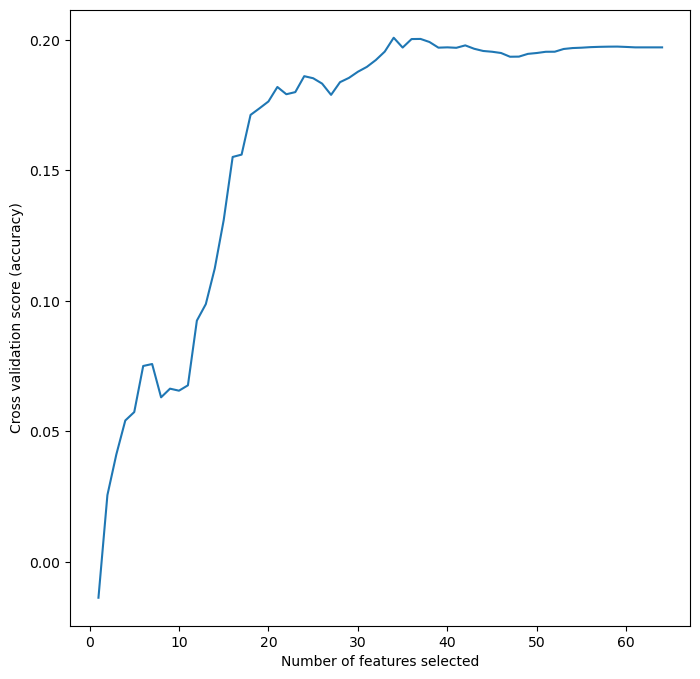

In [39]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_feats_select, len(rfecv.cv_results_["mean_test_score"]) + min_feats_select),
    rfecv.cv_results_["mean_test_score"],
)
plt.show()

In [40]:
## ElasticNet GridSearch Test
elastic_model = ElasticNet(max_iter=10000)
pipeline_steps = [
    ("preprocessor", preprocessor),
    ("model", elastic_model)
    ]
model_pipeline = Pipeline(pipeline_steps)
elastic_params = {
    "model__l1_ratio": [.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
    "model__alpha": [0.0001,0.001,0.01,0.1,1,10,100]
    }

grid_search = GridSearchCV(estimator=model_pipeline, param_grid=elastic_params, cv=5, n_jobs=-1, error_score="raise")

grid_search.fit(X_train, y_train)

elastic_best = grid_search.best_estimator_

print(elastic_best.score(X_test, y_test))

0.24151590863953043


In [41]:
## Test TransformedTargetRegressor with Ridge
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("ridge_model", Ridge(max_iter=10000))
])

ttr_pipe = TransformedTargetRegressor(
    regressor=ridge_pipeline,
    func=np.log,
    inverse_func=np.exp
)

ttr_params = {
    "regressor__ridge_model__solver": ["lsqr", "sparse_cg"],
    "regressor__ridge_model__alpha": [0.1,1,10,100]
}

ttr_grid = GridSearchCV(estimator=ttr_pipe, param_grid=ttr_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score="raise")
ttr_grid.fit(X_train, y_train)
ttr_best = ttr_grid.best_estimator_
print(ttr_best.score(X_test, y_test))
print(ttr_grid.best_params_)

0.26574582531668256
{'regressor__ridge_model__alpha': 10, 'regressor__ridge_model__solver': 'lsqr'}


In [42]:
## Regression Tree Test - Decision Tree - commented out b/c it takes a while to run
## Ended up not having that great performance
## Also tried RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV


# tree_pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("tree_model", DecisionTreeRegressor())
# ])

# tree_params = {
#     "tree_model__max_depth": np.arange(1,21).tolist()[0::2],
#     "tree_model__min_samples_split": np.arange(2,11).tolist()[0::2],
#     "tree_model__min_samples_leaf": [1, 2, 4, 15, 30, 100],
#     "tree_model__max_features": [None, "sqrt", "log2"],
#     "tree_model__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
#     "tree_model__max_leaf_nodes": np.arange(3,26).tolist()[0::2]
# }

# #tree_search = GridSearchCV(estimator=tree_pipeline, param_grid=tree_params, cv=5, n_jobs=-1, error_score="raise")
# tree_search = RandomizedSearchCV(estimator=tree_pipeline, param_distributions=tree_params, n_iter=20, cv=5, 
#                                  n_jobs=-1, error_score="raise", random_state=1)
# tree_search.fit(X_train, y_train)

# tree_best = tree_search.best_estimator_
# print(tree_best.score(X_test, y_test))
# print(tree_search.best_params_)

# Presentation Section

### Here's the Data Cleaning Steps I Used

<ul>
<li>Created target column - salary w/o bonus + bonus - filled nulls with 0 in bonus column
<li>Changed relevant column types to numeric
<li>Cleaned categories by reducing low freq. groups to "Other"
<li>Looked at description of numeric columns in initial eda and filtered for outliers & dropped duplicate rows
<li>Imputed null values in ColumnTransformer/Pipeline steps
<li>Did a mix of One-Hot and Ordinal encoding depending on columns also in ColumnTransformer/Pipeline
</ul>


In [43]:
## Trim whitespaces in column names & values
df_final = df_final.map(lambda x: x.strip() if isinstance(x, str) else x)
df_final.columns = df_final.columns.str.strip()

## target total salary column = yearly salary + yearly bonus
## Yearly bonus + stocks in EUR is object type - convert to float first
df_final["bonus_actual"] = pd.to_numeric(df_final["Yearly bonus + stocks in EUR"], errors="coerce", downcast="float")
## Assumes bonus is 0 if null
df_final["bonus_actual"] = df_final["bonus_actual"].fillna(0)
df_final["target"] = df_final["Yearly brutto salary (without bonus and stocks) in EUR"] + df_final["bonus_actual"]

## drop uneeded columns - including salaries and bonus used to make target column
df_final = df_final.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "bonus_actual"})

## Dropping rows where 60% of the data is missing/null
total_col = df_final.shape[1]
min_notnull = int(total_col * 0.4) + 1
df_final = df_final.dropna(thresh=min_notnull)

## Correcting column types
df_final["Age"] = pd.to_numeric(df_final["Age"], errors="coerce", downcast="integer")
df_final["Number of vacation days"] = pd.to_numeric(df_final["Number of vacation days"], errors="coerce", downcast="integer")

## Float columns
float_cols = [
    "Total years of experience",
    "Years of experience in Germany"
]

df_final[float_cols] = df_final[float_cols].apply(pd.to_numeric, errors="coerce", downcast="float")

#### Condensing Categories

In [44]:
## Replace low freq. categories
df_final["Other technologies/programming languages you use often"] = ml.replace_low_freq(df_final, "Other technologies/programming languages you use often", threshold=10, replacement="Other")

df_final["Your main technology / programming language"] = ml.replace_low_freq(df_final, "Your main technology / programming language", 10, "Other")
df_final["Your main technology / programming language"] = df_final["Your main technology / programming language"].replace({
    "Javascript": "JavaScript",
    "python": "Python",
    "JS": "JavaScript",
    "Python ": "Python",
    })

df_final["City"] = ml.replace_low_freq(df_final, "City", threshold=50, replacement="Other")

df_final["Position"] = ml.replace_low_freq(df_final, "Position", threshold=10, replacement="Other")

df_final["Seniority level"] = df_final["Seniority level"].replace({
    "Head": "Senior",
    "Lead": "Senior",
    "Principal": "Senior",
    "VP": "Senior",
    "Manager": "Senior",
    "CTO": "Senior",
    "Work Center Manager": "Senior",
    "Director": "Senior",
    "Key": "Senior",
    "C-level executive manager": "Senior",
    "C-Level": "Senior",
})

df_final["Employment status"] = df_final["Employment status"].replace({
    "Company Director": "Full-time employee",
    "full-time, but 32 hours per week (it was my request, I'm a student)": "Full-time employee",
    "Founder": "Full-time employee"
})
df_final["Employment status"] = ml.replace_low_freq(df_final, "Employment status", threshold=30, replacement="Other")

df_final["Main language at work"] = ml.replace_low_freq(df2, "Main language at work", threshold=190, replacement="Not English")

df_final["Company size"] = df_final["Company size"].replace({
    "1000+": "Large",
    "101-1000": "Medium-Large",
    "11-50": "Medium",
    "51-100": "Medium",
    "up to 10": "Micro"
})

df_final["Company type"] = ml.replace_low_freq(df_final, "Company type", threshold=100, replacement="Other")

### Duplicate & Outlier Cleaning

In [45]:
## EDA shows some duplicated rows - 17 out of 1249 (~1.4%) - should be fine to drop them
df_final = df_final.drop_duplicates(keep="first")

## Filtering out outliers - total years of experience having max of 383 years seems unlikely, number of vacation days having max of 365 days also seems unlikely, and target salary...
## having 5.5 billion as a salary seems extreme
df_final = df_final[df_final["Number of vacation days"] < 100]
df_final = df_final[df_final["Total years of experience"] < 65]
df_final = df_final[df_final["target"] < 200000]
## Nulls will be imputed later

## Preprocessing Pipeline Construction

In [46]:
## Changing Seniority level to category for ordinal encoding
df_final["Seniority level"] = df_final["Seniority level"].astype("category")

## Preprocessing and splitting
num_cols = df_final.select_dtypes(include=["float", "int"]).columns.tolist()
num_cols.remove("target") ## Remove target from features list
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

obj_cols = df_final.select_dtypes(include=["object"]).columns.tolist()
obj_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="if_binary", handle_unknown="ignore"))
    ])

seniority_categories = [["Other", "Junior", "Middle", "Senior"]]
ord_cols = ["Seniority level"]
ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=seniority_categories, handle_unknown="use_encoded_value", unknown_value=-1))
    ])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("obj", obj_transformer, obj_cols),
    ("ord", ord_transformer, ord_cols)
])

Xf = df_final.drop(columns={"target"})
yf = df_final["target"]
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=.3)

## Tuning/Feature Selection Steps



<ul>
<li>Tried an RFECV to do feature selection - seemed to result in 0 features being removed
<li>Tried GridSearch of an Elastic Net model to do feature selection - overall performance is low, similar score to TTR (Ridge)
<li>Tuned Elastic Net Model mainly w/ L1 ratio to find ideal blend between L1 & L2
</ul>

Ideal # of feats: 58
Feats removed: 0
['num__Age' 'num__Total years of experience'
 'num__Years of experience in Germany' 'num__Number of vacation days'
 'obj__Gender_Diverse' 'obj__Gender_Female' 'obj__Gender_Male'
 'obj__City_Berlin' 'obj__City_Munich' 'obj__City_Other'
 'obj__Position_Backend Developer' 'obj__Position_Data Engineer'
 'obj__Position_Data Scientist' 'obj__Position_Designer (UI/UX)'
 'obj__Position_DevOps' 'obj__Position_Frontend Developer'
 'obj__Position_ML Engineer' 'obj__Position_Mobile Developer'
 'obj__Position_Other' 'obj__Position_Product Manager'
 'obj__Position_QA Engineer' 'obj__Position_Software Engineer'
 'obj__Your main technology / programming language_.NET'
 'obj__Your main technology / programming language_C++'
 'obj__Your main technology / programming language_Go'
 'obj__Your main technology / programming language_Java'
 'obj__Your main technology / programming language_JavaScript'
 'obj__Your main technology / programming language_Kotlin'
 'obj__Your

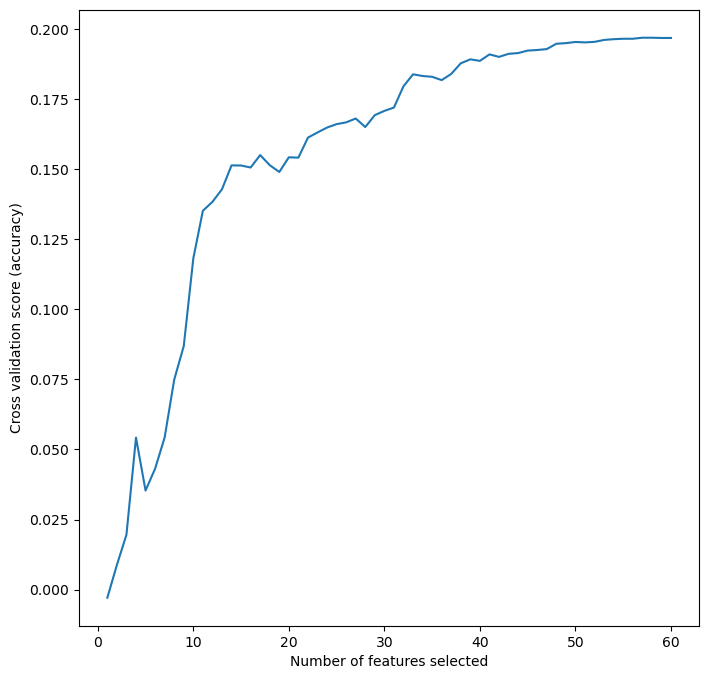

In [47]:
## Feature Selection Test
xf_processed = preprocessor.fit_transform(Xf)

min_feats_select = 1
feat_est = LinearRegression()
rfecv = RFECV(
    estimator=feat_est,
    step=1,
    cv=5,
    scoring="r2",
    min_features_to_select=min_feats_select
)

rfecv.fit(xf_processed, yf)

feat_names = preprocessor.get_feature_names_out()
mask_rfecv = rfecv.get_support()
new_feats = feat_names[mask_rfecv]
print("Ideal # of feats: %d" % rfecv.n_features_)
print("Feats removed:", len(new_feats) - rfecv.n_features_)
print(new_feats)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_feats_select, len(rfecv.cv_results_["mean_test_score"]) + min_feats_select),
    rfecv.cv_results_["mean_test_score"],
)
plt.show()

In [48]:
final_elastic_model = ElasticNet(max_iter=10000)
final_pipeline_steps = [
    ("preprocessor", preprocessor),
    ("model", final_elastic_model)
    ]
final_model_pipeline = Pipeline(pipeline_steps)
final_elastic_params = {
    "model__l1_ratio": [0.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
    "model__alpha": [1,5,10,20,25]
    }

final_grid_search = GridSearchCV(estimator=final_model_pipeline, param_grid=final_elastic_params, cv=5, n_jobs=-1, error_score="raise")

final_grid_search.fit(Xf_train, yf_train)

final_elastic_best = final_grid_search.best_estimator_

print(final_elastic_best.score(Xf_test, yf_test))
print(final_grid_search.best_params_)

0.24207414151954987
{'model__alpha': 25, 'model__l1_ratio': 1}


In [49]:
final_ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("ridge_model", Ridge(max_iter=10000))
])

final_ttr_pipe = TransformedTargetRegressor(
    regressor=final_ridge_pipeline,
    func=np.log,
    inverse_func=np.exp
)

final_ttr_params = {
    "regressor__ridge_model__solver": ["lsqr", "sparse_cg"],
    "regressor__ridge_model__alpha": [0.1,1,8,10,11]
}

final_ttr_grid = GridSearchCV(estimator=final_ttr_pipe, param_grid=final_ttr_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, error_score="raise")
final_ttr_grid.fit(Xf_train, yf_train)
final_ttr_best = final_ttr_grid.best_estimator_

print(final_ttr_best.score(Xf_test, yf_test))
print(final_ttr_grid.best_params_)

0.23106001564343448
{'regressor__ridge_model__alpha': 10, 'regressor__ridge_model__solver': 'sparse_cg'}


## Final Model's Performance



In [50]:
final_elastic_model = ElasticNet(max_iter=10000)
final_pipeline_steps = [
    ("preprocessor", preprocessor),
    ("model", final_elastic_model)
    ]
final_model_pipeline = Pipeline(pipeline_steps)
final_elastic_params = {
    "model__l1_ratio": [1],
    "model__alpha": [25] ## Based on tuning overall these HPs seem the best
    }

final_grid_search = GridSearchCV(estimator=final_model_pipeline, param_grid=final_elastic_params, cv=5, n_jobs=-1, error_score="raise")

final_grid_search.fit(Xf_train, yf_train)

final_elastic_best = final_grid_search.best_estimator_

print(final_elastic_best.score(Xf_test, yf_test))
print(final_grid_search.best_params_)

0.24207414151954987
{'model__alpha': 25, 'model__l1_ratio': 1}


## Final Conclusion on What Worked Best
<ul>
<li>Pretty low scores - nothing above 0.31 out of the 3 main models I tried - Elastic Net, TTR w/ Rigid, & Regression Tree
<li>Elastic Net model & TTR w/ (Ridge) seemed to perform the best on average (Compared to Regression Tree) - Elastic slightly performs better on average usually but both are very close
<li>After tuning the HPs a bit based on GridSearch peak scores of ~0.13-0.27 for Elastic and ~0.11-0.3 for TTR - TTR seems more volatile depending on train/test split
<li>StandardScaler() vs MinMaxScaler() seems to have made a difference - got higher scores with standard - seemed to increase Optimal Features not quite sure why - goes from 44 to 60
<li>testing Feature Selection with RFECV seemed to not require any features to be dropped - in testing section ideal features was 34 but in presentation section it was 60
<li>Ideas for improvement: Further cleaning/formatting of categories (Possibly ordinal encoding for employment status & Company Size) & doing log transformations on the dataset - a lot of distributions were normal enough but had some skew
</ul>

<p>
</p>